In [5]:
import xarray as xr
import numpy as np
from glob import glob
import os

import gcsfs
from tqdm import tqdm
import fsspec

xr.set_options(display_style="html");

In [6]:
indir = '/Users/dporter/data/Antarctic/melt'
infile = 'bb0448974g_3_1.h5'

In [11]:
ds = xr.open_dataset(os.path.join(indir, infile))
ds

<xarray.Dataset>
Dimensions:     (phony_dim_0: 10229, phony_dim_1: 10941, phony_dim_2: 1)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables:
    w_b         (phony_dim_0, phony_dim_1) float64 ...
    w_b_interp  (phony_dim_0, phony_dim_1) float64 ...
    w_b_uncert  (phony_dim_0, phony_dim_1) float64 ...
    x           (phony_dim_1, phony_dim_2) float64 ...
    y           (phony_dim_0, phony_dim_2) float64 ...
Attributes:
    Version:  v0

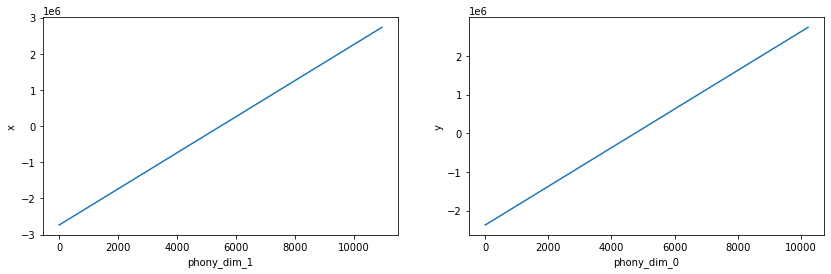

In [16]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
ds.x.plot(ax=ax1)
ds.y.plot(ax=ax2)

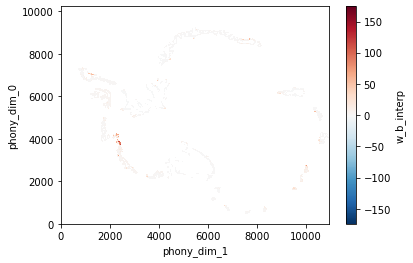

In [23]:
ds.w_b_interp.plot()

In [24]:
wcoarse = ds.w_b_interp.coarsen(phony_dim_1=10, phony_dim_0=10, 
                                boundary="trim")

In [27]:
wcoarse.data

AttributeError: 'DataArrayCoarsen' object has no attribute 'data'